# Challenge Quiz 11: Association Analysis

Consider a supermarket with a large number of items that can be purchased. Which of the items are best sellers? Which items are frequently purchased together? Are there transactions that suggest a trending consumer purchasing habit, i.e., men who buy diapers also buy beer?  As you know, association analysis is an unsupervised approach that can help us consider these questions. The attached file 'store_transaction.csv' contains a dataset of a store with thousands of transactions of customers purchasing items from the store.

Using the information that you have gained from the guided exercise, answer the questions in this Challenge Quiz. As usual, submit your Jupyter notebook in your Sakai Drop Box folder.

In [31]:
#  Load libraries
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder

In [2]:
# note that there is no header information in the dataset
# each row is a transaction containing items purchased
# ****use skipinitialspace here, see documentation, why?

# read in data
transaction_df = pd.read_csv('store_transaction.csv',  skipinitialspace = True, header=None)

# dataframe into python list
transactions = transaction_df.values.tolist()
transactions

[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers',
  'meatballs',
  'eggs',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['chutney',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['turkey',
  'avocado',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['mineral water',
  'milk',
  'energy bar',
  'whole wheat rice',
  'green tea',
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 ['low fat yogurt',
  nan,
  n

## Question 1:
How many transactions are in the dataset?

In [18]:
# Answer here, show code
print ('There are \033[1m {} \033[0m customer transactions in the dataset'.format(transaction_df.shape[0]))

There are   7501  customer transactions in the dataset


In [104]:
print ('There are at most \033[1m {} \033[0m itmes in the largest transaction'.format(transaction_df.shape[1]))

There are at most  20  itmes in the largest transaction


## Question 2:
What is the greatest number of items a customer has  purchased in a single transaction? 

In [14]:
# Answer here, show code

In [179]:
# data preparation to conform data to transformer input
# Python list of lists, with nan removed
basket = []

# remove nan from transactions, by comparing each item with itself (which is false for nan)
#basket =[[item for item in transactions if item == item]for transactions in basket] 
biggest_transaction = 0
for a_transaction in transactions:
    transaction = []
    item_count = 0
    for item in a_transaction:
        if item == item:
            transaction.append(item)
            item_count = item_count +1
    if biggest_transaction < item_count:  biggest_transaction = item_count
    basket.append(transaction)    

biggest_transaction            

20

In [180]:
print('the greatest number of items a customer has purchased in a single transaction is: {}'.format(biggest_transaction))

the greatest number of items a customer has purchased in a single transaction is: 20


## Question 3: 
How many possible items could be purchased, assuming that  all the items are contained in the dataset (how many unique items)?

In [115]:
# Answer here, show code
# all but the nan
print('There are \33[1m{} \33[0mpossible items that can be purchased'.format(len(np.unique(transactions))-1))

There are 119 possible items that can be purchased


## Question 4:
We are interested in identifying the bestsellers in the supermarket. What are the 5 most frequent (popular) items purchased in the dataset?

In [88]:
# Answer here, show code
# we create a dictionay data structure and iterate across the basket, adding items to the dictionary
allItems= dict()
for trans in basket:
    for item in trans:
        allItems[item]=  allItems.get(item, 0) + 1
        
# sort and print the 5 most frequent items
sortedItems = pd.DataFrame(sorted(((v, k) for k, v in allItems.items()), reverse = True)[0:10])


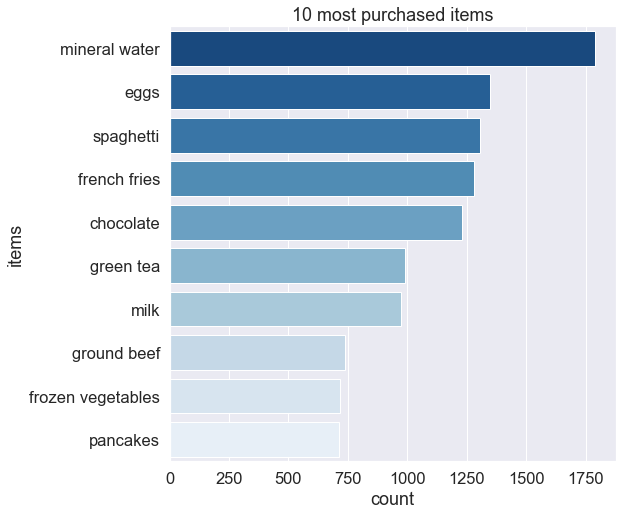

In [99]:
fig, ax = plt.subplots(figsize=(8, 8))
#sns.set_theme(color_codes=True)
sns.set(font_scale=1.5)
sns.axes_style("darkgrid")
ax = sns.barplot(x =sortedItems[0], y= sortedItems[1], palette="Blues_r")
ax.set_title('10 most purchased items')
ax.set_xlabel('count')
ax.set_ylabel('items')
plt.show()

## Question 5:
Find the frequent itemsets in the dataset at support thresholds of 1%, 2%, 3%, 4%, 5%, 6%, 8%, 10%, 12%, 16% and 20%.  In a single figure, for each threshold (x-axis), plot the number of itemsets that are frequent (y-axis).  From this figure, which of the following statements is TRUE?

In [122]:
# Answer here, show code

# Create encoder
te = TransactionEncoder()

# Transform input data into a one-hot encoded NumPy boolean array
te_array = te.fit(basket).transform(basket)
te_array.astype("int")

# convert data into pandas df
basket_df = pd.DataFrame(te_array, columns=te.columns_)
basket_df.sample(4)

,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
3674,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
252,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2733,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3898,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [125]:
# Load libraries
from mlxtend.frequent_patterns import apriori

# Find frequent itemsets, input should be a one-hot DataFrame

min_support = 0.01 # set minsup 

frequent_itemsets = apriori(basket_df, min_support, use_colnames=True) 
#If use_colnames=True, uses DataFrames' column names in the returned DataFrame instead of column indices.

# Display results sorted by support value
frequent_itemsets.sort_values(by=['support'], ascending = False)

,support,itemsets
46,0.238368,(mineral water)
19,0.179709,(eggs)
63,0.174110,(spaghetti)
24,0.170911,(french fries)
13,0.163845,(chocolate)
...,...,...
255,0.010265,"(spaghetti, mineral water, olive oil)"
123,0.010132,"(chocolate, soup)"
246,0.010132,"(eggs, ground beef, mineral water)"
249,0.010132,"(spaghetti, french fries, mineral water)"


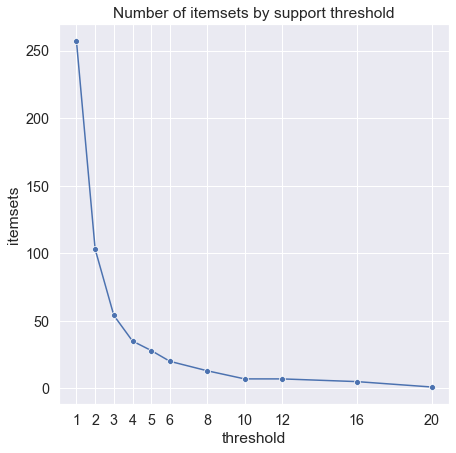

In [138]:
x_threshols= np.array([1,2,3,4,5,6,8,10,12,16,20])
y_num_itemsets = []


for t in x_threshols:
    y_num_itemsets.append(np.sum(frequent_itemsets['support']>=t/100))
y_itemsets =np.array(y_num_itemsets)

fig, ax = plt.subplots(figsize=(7, 7))
sns.set(font_scale=1.3)
sns.axes_style("darkgrid")
ax = sns.lineplot(x =x_threshols, y= y_itemsets, marker='o')
ax.set_title('Number of itemsets by support threshold')
ax.set_xlabel('threshold')
ax.set_ylabel('itemsets')
ax.set_xticks(x_threshols)
plt.show()

## Question 6:  
Of the following frequent itemsets, for minsup = 1%, which has the least support?
1. {Mineral Water}
2. {Chocolate}
3. {Eggs}
4. {Eggs, Mineral Water}
5. {Chocolate, Mineral Water}
6. {Eggs, Chocolate, Mineral Water}

In [175]:
# Answer here, show code
print('mineral water: {}'.format(frequent_itemsets['support'][frequent_itemsets.itemsets==set({'mineral water'})].values[0]))
print('chocolate: {}'.format(frequent_itemsets['support'][frequent_itemsets.itemsets==set({'chocolate'})].values[0]))
print('eggs:{}'.format(frequent_itemsets['support'][frequent_itemsets.itemsets==set({'eggs'})].values[0]))
print('eggs, mineral water: {}'.format(frequent_itemsets['support'][frequent_itemsets.itemsets==set({'eggs', 'mineral water'})].values[0]))
print('chocolate, mineral water: {}'.format(frequent_itemsets['support'][frequent_itemsets.itemsets==set({'chocolate', 'mineral water'})].values[0]))
print('eggs,chocolate,mineral water: {}'.format(frequent_itemsets['support'][frequent_itemsets.itemsets==set({'eggs','chocolate','mineral water'})].values[0]))


mineral water: 0.23836821757099053
chocolate: 0.1638448206905746
eggs:0.17970937208372217
eggs, mineral water: 0.05092654312758299
chocolate, mineral water: 0.05265964538061592
eggs,chocolate,mineral water: 0.013464871350486601


## Question 7:
In order to boost mineral water sales, the supermarket data analysis team suggests placing mineral water near the freezer where ground beef is located. They are test marketing based on the rule that people that purchase ground beef are likely to purchase mineral water. What is the confidence of such a rule?

the rule $\{\text{Ground Beef}\} \implies \{\text{mineral Water}\}$.



In [183]:
# Answer here, show code
# Load libraries
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.01)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(avocado),(mineral water),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147
1,(mineral water),(avocado),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113
2,(burgers),(cake),0.087188,0.081056,0.011465,0.131498,1.622319,0.004398,1.058080
3,(cake),(burgers),0.081056,0.087188,0.011465,0.141447,1.622319,0.004398,1.063198
4,(burgers),(chocolate),0.087188,0.163845,0.017064,0.195719,1.194537,0.002779,1.039630


In [194]:
print('The confidence of the rule is {}%'.format(rules.confidence[(rules.antecedents==set({'ground beef'})) & (rules.consequents==set({'mineral water'}))].values[0]*100))

The confidence of the rule is 41.65535956580732%
